## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [1]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


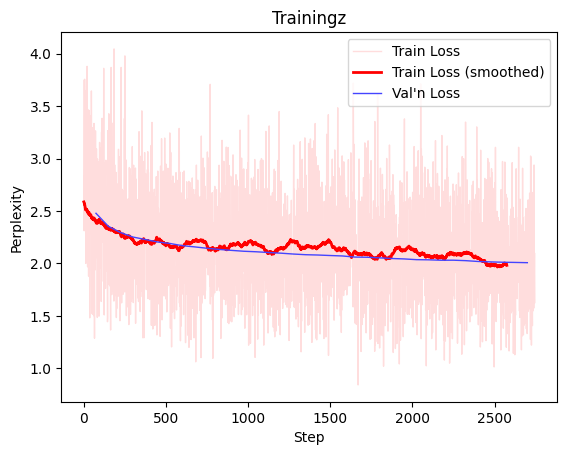

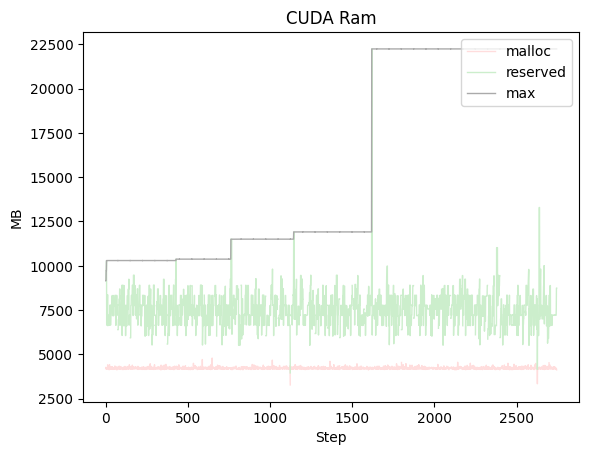

In [2]:
tdat = pd.read_csv('lightning_logs/version_4/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(100, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz


plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()

plt.plot( tdat.traincuda_malloc_mb, label = 'malloc', color='#fdd', linewidth=1)
plt.plot( tdat.traincuda_reserved_mb, label = 'reserved', color='#cec', linewidth=1)
plt.plot( tdat.traincuda_max_reserved_mb, label = 'max', color='#aaa', linewidth=1)

plt.xlabel('Step')
plt.ylabel('MB')
plt.legend(loc='upper right')
plt.title('CUDA Ram')
plt.show()


In [3]:
np.mean(tdat.train_loss[-100:])


2.0096519342576613

In [4]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

74      2.478119
149     2.354146
224     2.294143
299     2.251785
374     2.228390
449     2.204534
524     2.190589
599     2.169595
674     2.157982
749     2.144896
824     2.133586
899     2.124620
974     2.116279
1049    2.111362
1124    2.104323
1199    2.097944
1274    2.089824
1349    2.083439
1424    2.080429
1499    2.075667
1574    2.071330
1649    2.060862
1724    2.059222
1799    2.053441
1874    2.047204
1949    2.043148
2024    2.036226
2099    2.034642
2174    2.030700
2249    2.031047
2324    2.026644
2399    2.018899
2474    2.014841
2549    2.011642
2624    2.009754
2699    2.007423
Name: val_loss, dtype: float64

In [5]:
tdat[-100:]

,train_loss,length,traincuda_malloc_mb,traincuda_reserved_mb,traincuda_max_reserved_mb,epoch,step,val_loss,valcuda_malloc_mb,valcuda_reserved_mb,valcuda_max_reserved_mb
2645,2.550947,40.0,4247.703125,9242.0,22240.0,0,261099,NaN,NaN,NaN,NaN
2646,3.107134,27.0,4192.253418,9810.0,22240.0,0,261199,NaN,NaN,NaN,NaN
2647,2.647955,23.0,4172.289062,9810.0,22240.0,0,261299,NaN,NaN,NaN,NaN
2648,1.998301,33.0,4213.307129,7186.0,22240.0,0,261399,NaN,NaN,NaN,NaN
2649,2.237493,27.0,4192.253418,7202.0,22240.0,0,261499,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2740,2.938340,28.0,4196.157715,7208.0,22240.0,0,270499,NaN,NaN,NaN,NaN
2741,1.995176,33.0,4213.369629,7208.0,22240.0,0,270599,NaN,NaN,NaN,NaN
2742,1.817974,29.0,4198.937012,7594.0,22240.0,0,270699,NaN,NaN,NaN,NaN
2743,1.621744,27.0,4189.565918,8742.0,22240.0,0,270799,NaN,NaN,NaN,NaN


In [6]:
np.mean(tdat.length)

34.656161476788405